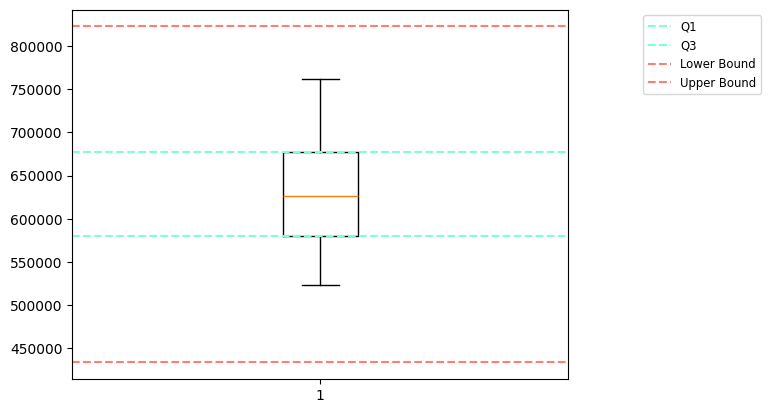

The average emissions level over the specified period is 629422.90625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56625.66070844867 units.
The maximum value is 762474 carbon dioxide equivalents (CO2e), as established by the United Nations Framework Convention on Climate Change (UNFCCC), corresponding to the year of 2011
The minimum value is 523162 carbon dioxide equivalents (CO2e), corresponding to the year of 1994
Lower bound for outliers: 433553.875
Upper bound for outliers: 822766.875
Outliers: Empty DataFrame
Columns: [sector, time, Greenlands total emission of greenhousegasses]
Index: []
There are not outliers in this dataset


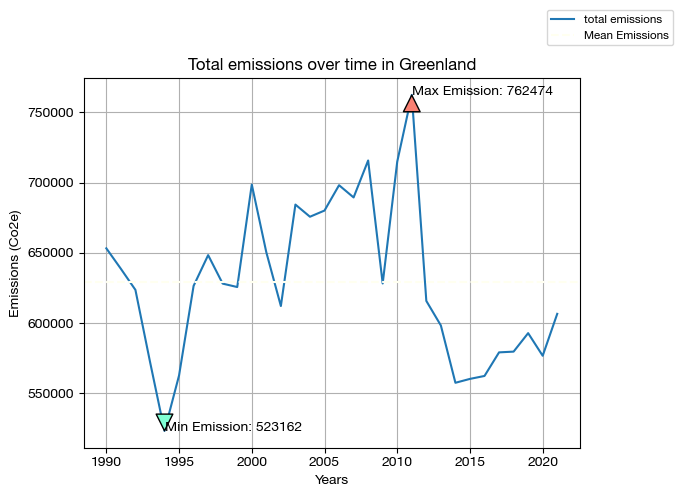

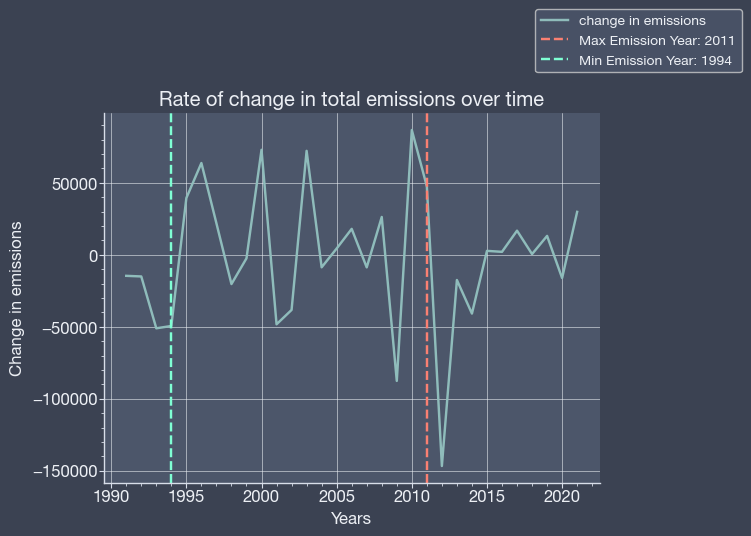

R-squared: 0.6160066600364945
RMSE: 34536.747306330726
Slope of Regression Line: 6.229180266273012


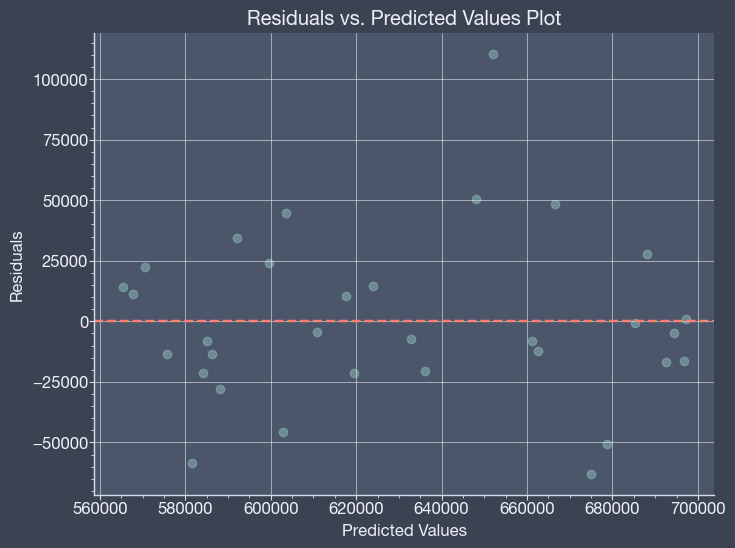

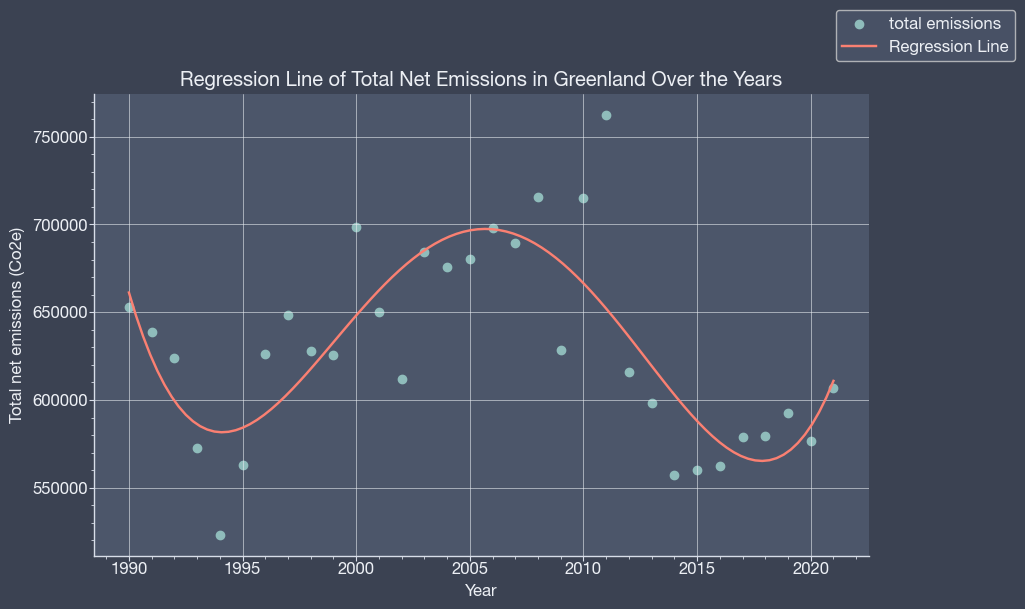

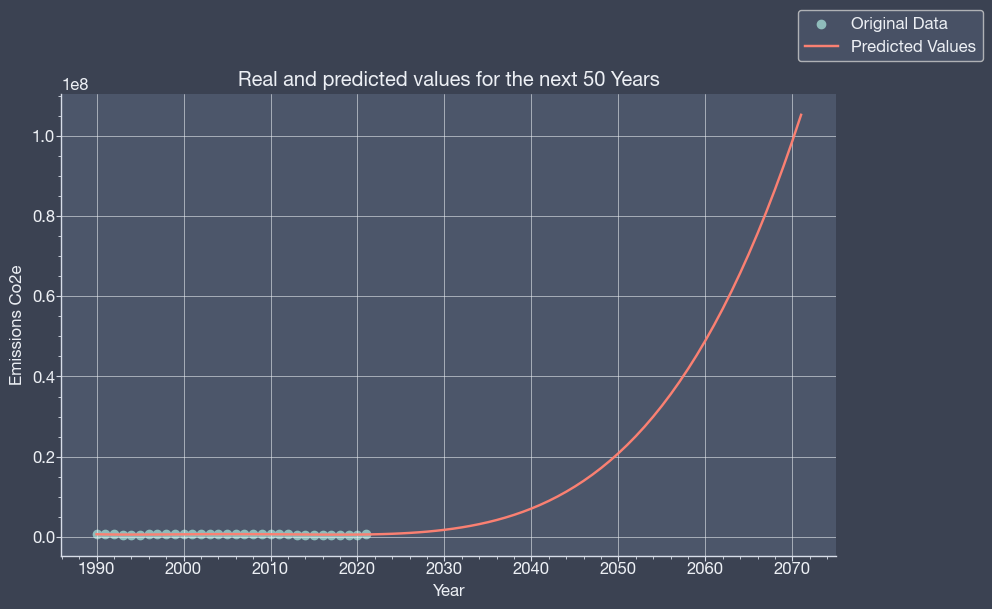

In [1]:
%run greenland_greenhouse_emissions_total.ipynb

In [2]:
fuel_df = df[df['sector'].isin(['Total (net emissions)', '1. Emissions from fuel combustion', '  1.A Energy Industries', '  1.B Industry and Construction', '  1.C Transport', '  1.D Other Sectors'])]
fuel_df = fuel_df.drop(columns=['greenhousegas'])

fuel_df.head()

,sector,time,Greenlands total emission of greenhousegasses
0,Total (net emissions),1990,653216
1,Total (net emissions),1991,638634
2,Total (net emissions),1992,623622
3,Total (net emissions),1993,572582
4,Total (net emissions),1994,523162


In [3]:
#get the mean value for fuel emissions over the period between 1990-2020
mean_fuel_emissions = fuel_df[fuel_df['sector'] == '1. Emissions from fuel combustion']['Greenlands total emission of greenhousegasses'].mean()
std_dev_fuel_emissions = fuel_df[fuel_df['sector'] == '1. Emissions from fuel combustion']['Greenlands total emission of greenhousegasses'].std()

print(f'The average fuel emissions level over the specified period is {mean_fuel_emissions} units.\
There is a moderate amount of variability in the emissions data, with emissions values typically deviating \
from the average by approximately {std_dev_fuel_emissions} units.')

#select only total fuel emissions, not divided by sub-sector
total_fuel_emissions = fuel_df[fuel_df['sector'] == '1. Emissions from fuel combustion']

#Find the index of the maximum value
max_index = total_fuel_emissions['Greenlands total emission of greenhousegasses'].idxmax()

# Get the corresponding year value using the index
max_year = fuel_df.loc[max_index, 'time']

# Get the maximum value
max_value = total_fuel_emissions['Greenlands total emission of greenhousegasses'].max()

print(f'The maximum value of fuel emissions is {max_value} carbon dioxide equivalents (CO2e),corresponding to the year of {max_year}')

#Find the index of the minimum value
min_index = total_fuel_emissions['Greenlands total emission of greenhousegasses'].idxmin()

# Get the corresponding year value using the index
min_year = fuel_df.loc[min_index, 'time']

# Get the minimum value
min_value = total_fuel_emissions['Greenlands total emission of greenhousegasses'].min()

print(f'The minimum value is {min_value} carbon dioxide equivalents (CO2e), corresponding to the year of {min_year}')

The average fuel emissions level over the specified period is 595974.625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56262.94800582753 units.
The maximum value of fuel emissions is 726386 carbon dioxide equivalents (CO2e),corresponding to the year of 2011
The minimum value is 495672 carbon dioxide equivalents (CO2e), corresponding to the year of 1994


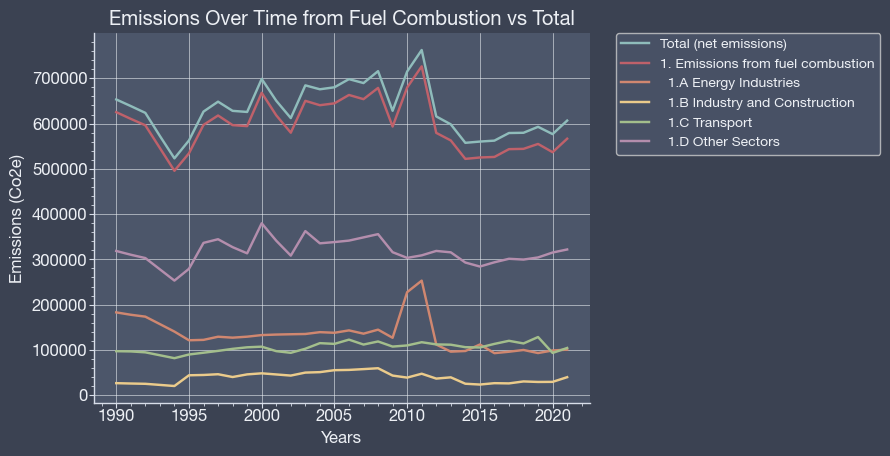

In [6]:
# Iterate over unique values in the 'sector' column
for sector in fuel_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = fuel_df[fuel_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Fuel Combustion vs Total')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from fuel combustion vs total.jpg', bbox_inches='tight')

plt.show()

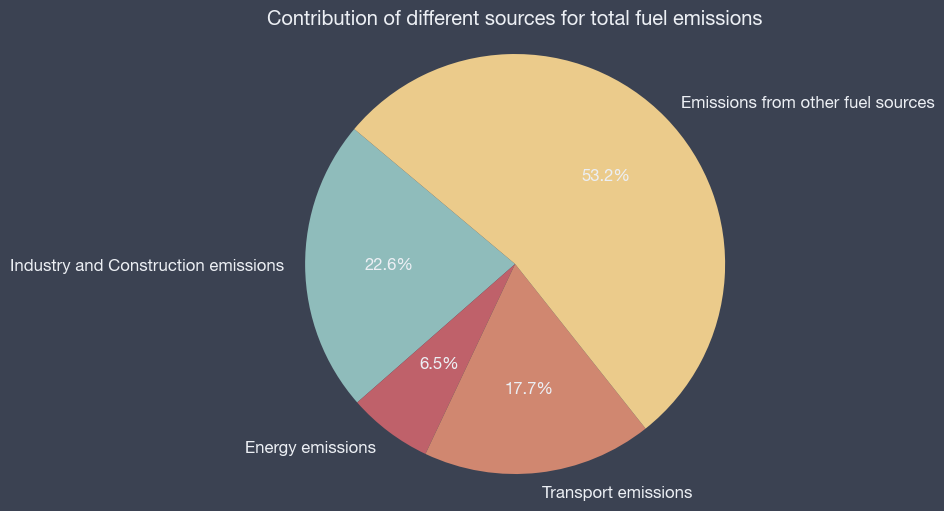

In [5]:
total_emissions = fuel_df[fuel_df['sector'] == '1. Emissions from fuel combustion']['Greenlands total emission of greenhousegasses'].sum()
energy_emissions = fuel_df[fuel_df['sector'] == '  1.A Energy Industries']['Greenlands total emission of greenhousegasses'].sum()
industry_const_emissions = fuel_df[fuel_df['sector'] == '  1.B Industry and Construction']['Greenlands total emission of greenhousegasses'].sum()
transport_emissions = fuel_df[fuel_df['sector'] == '  1.C Transport']['Greenlands total emission of greenhousegasses'].sum()
other_emissions = fuel_df[fuel_df['sector'] == '  1.D Other Sectors']['Greenlands total emission of greenhousegasses'].sum()

# Calculate the percentage of energy emissions
percentage_energy_emissions = (energy_emissions / total_emissions) * 100

# Calculate the percentage of emissions from industry
percentage_industry_const_emissions = (industry_const_emissions / total_emissions) * 100

# Calculate the percentage of emissions from transport
percentage_transport_emissions = (transport_emissions / total_emissions) * 100

# Calculate the percentage of emissions from other fuel sources
percentage_other_emissions = (other_emissions / total_emissions) * 100

# Create labels for the pie chart
labels = ['Industry and Construction emissions', 'Energy emissions', 'Transport emissions', 'Emissions from other fuel sources']

# Create sizes for the pie chart
sizes = [percentage_energy_emissions, percentage_industry_const_emissions, percentage_transport_emissions, percentage_other_emissions]

# Create the pie chart
plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of different sources for total fuel emissions')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Contribution of different sources for total fuel emissions.jpg', bbox_inches='tight')

plt.show()